Computational Quantum Mechanics  
by Joshua Izaac, Jingbo Wang  
Example 9.1 Solve the following differential equation using the bisection shooting method  
$y^{\prime\prime}+5y^\prime= 5x$, $x\in[0,1]$, $y(0) = 1$, $y(1) = 0$.  

Transform the second-order differential equation into the dynamic form of 1st-order differntial equations:  
$$
\frac{d}{dt}\begin{pmatrix}
y\\
y^\prime
\end{pmatrix}
=\begin{pmatrix}
y^\prime\\
5x - 5y^\prime
\end{pmatrix}
$$
thus
$$
\frac{d}{dt}\begin{pmatrix}
y_0\\
y_1
\end{pmatrix}
=\begin{pmatrix}
y_1\\
5x - 5y_1
\end{pmatrix}
$$

**The solution doesn't agree with the text.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline

In [2]:
from root_solver import bisection
from ode_solver import heun, rk4

In [3]:
dx = 0.01
xlow = 0
xhigh = 1
x = np.arange(xlow,xhigh+dx,dx)

In [4]:
def drive_func(y,x,args=None):
    dydx = [y[1], 5*x - 5*y[1]]
    return dydx

In [5]:
def solve_ode(alpha):
    y0 = 1
    y0 = np.array([y0,alpha])   
    #y = heun(drive_func,y0,x)
    y = rk4(drive_func,y0,x)
    return y

In [6]:
def root_func(alpha): # alpha: y'(0)
    yL = 0
    y = solve_ode(alpha)
    res = y[-1,0] - yL
    return res 

In [7]:
def plot_root_func(ax):
    alphas = np.linspace(-10,10,20)
    root_func_values = np.zeros(len(alphas))
    
    for idx,alpha in enumerate(alphas):
        root_func_values[idx] = root_func(alpha)
    
    ax.plot(alphas, root_func_values,'ro-')
    ax.grid('on')
    ax.axhline()

In [8]:
def shoot_bisection():
    # plot the function to seek the inital interval
    fig,ax = plt.subplots(1,2,figsize=(10,7))
    plot_root_func(ax[0])
    
    tol = 0.5e-4
    alpha, iteration_counter = bisection(root_func,-8,0,tol)
    print(alpha)
    
    y = solve_ode(alpha)
    
    ax[1].plot(x, y[:,0],'b.-')
    ax[1].grid('on')    
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_title('$y^{\prime\prime}+5y^\prime= 5x, y(0) = 1, y(1) = 0$')

-6.7440948486328125


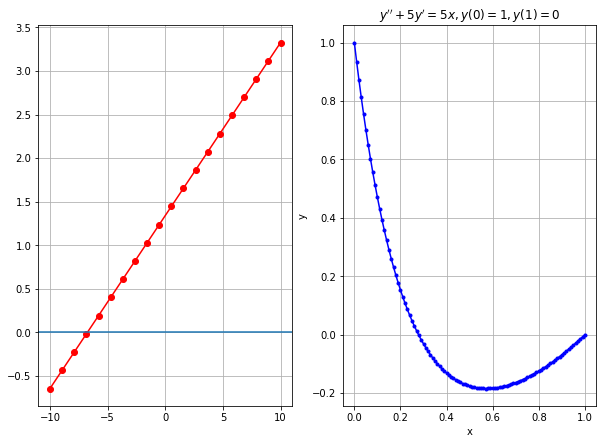

In [9]:
if __name__ == '__main__':
    shoot_bisection()